In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../../500hits.csv', encoding='latin-1')

In [3]:
df.head()

,PLAYER,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,BA,HOF
0,Ty Cobb,24,3035,11434,2246,4189,724,295,117,726,1249,357,892,178,0.366,1
1,Stan Musial,22,3026,10972,1949,3630,725,177,475,1951,1599,696,78,31,0.331,1
2,Tris Speaker,22,2789,10195,1882,3514,792,222,117,724,1381,220,432,129,0.345,1
3,Derek Jeter,20,2747,11195,1923,3465,544,66,260,1311,1082,1840,358,97,0.310,1
4,Honus Wagner,21,2792,10430,1736,3430,640,252,101,0,963,327,722,15,0.329,1


In [4]:
df.drop(['PLAYER','CS'], axis=1, inplace=True)

In [5]:
df['HOF'].value_counts()

HOF
0    313
1    151
2      1
Name: count, dtype: int64

In [6]:
df = df[df['HOF']!=2]

In [7]:
X = df.iloc[:,:-1]
y = df['HOF']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [10]:
scaler = StandardScaler()

In [11]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Tuning

In [13]:
svc = SVC(random_state=42)

In [14]:
ada = AdaBoostClassifier(estimator=svc, algorithm='SAMME', random_state=42)

In [33]:
param_grid = {
    'estimator__C':[0.1,0.5,1],
    'estimator__kernel':['poly','rbf', 'linear'],
    'estimator__gamma':[ 'scale','auto'],
    # 'estimator__coef0':[0.01,0.001,0.5],
    'estimator__degree':[2,3,4],
    'n_estimators':[10,25,50],
    # 'learning_rate':[0.01,0.1,1]
}

In [34]:
gcv = GridSearchCV(ada, param_grid, cv=3, scoring='neg_log_loss', n_jobs=-1)

In [35]:
gcv.fit(X_train, y_train)

D:\PythonDS\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          estimator=SVC(random_state=42),
                                          random_state=42),
             n_jobs=-1,
             param_grid={'estimator__C': [0.1, 0.5, 1],
                         'estimator__degree': [2, 3, 4],
                         'estimator__gamma': ['scale', 'auto'],
                         'estimator__kernel': ['poly', 'rbf', 'linear'],
                         'n_estimators': [10, 25, 50]},
             scoring='neg_log_loss')

In [36]:
gcv.best_params_

{'estimator__C': 1,
 'estimator__degree': 2,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'linear',
 'n_estimators': 10}

In [37]:
best_model = gcv.best_estimator_

### Prediction

In [38]:
y_pred = best_model.predict(X_test)

In [39]:
a_score = accuracy_score(y_test,y_pred)
a_score

0.8494623655913979

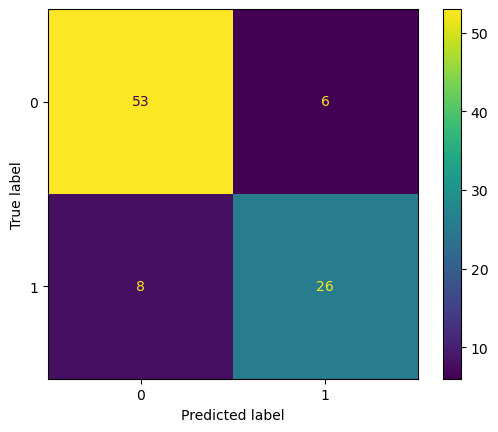

In [40]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()